# Question 1 : Visualizing Pleiades cluster

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
stardata=pd.read_csv('stardata.csv',header=None,sep=',')      # reading the csv file and converting it to a DataFrame

In [26]:
stardata.head()

,0,1,2,3
0,56.566774,24.189735,7.3935352662039655,8.208464
1,56.557355,24.196560,7.545834754428319,7.323018
2,56.613757,24.254807,7.21777120370273,7.339084
3,56.642808,24.138091,3.5113645931028596,11.468399
4,56.663986,24.103001,7.418396935580117,9.191837


In [27]:
# if the dataframe contains some non numeric value then we remove the corresponding row 
# and reset the index
cleaned_stardata=stardata[pd.to_numeric(stardata[2],errors='coerce').notnull()].reset_index() 

In [28]:
#see the difference between the index 
stardata.index

RangeIndex(start=0, stop=200, step=1)

In [29]:
cleaned_stardata.index

RangeIndex(start=0, stop=196, step=1)

In [30]:
# calculating the distances in persec of each star
distances = []
for i in range (len(cleaned_stardata)):
    distances.append(1000/float(cleaned_stardata[2][i]))
distances

[135.25329412723912,
 132.52344273947213,
 138.54692422045716,
 284.7895664164962,
 134.80001254769743,
 2229.7263153044973,
 297.5314082998898,
 129.7220933800577,
 134.56106276999006,
 267.87604308303963,
 910.4807292955288,
 389.6744011418855,
 136.03845763688184,
 128.81972862530256,
 873.6199894656345,
 136.60667929213753,
 138.38866546523184,
 105.5079345272796,
 93.95698583947186,
 2832.144518118237,
 133.27990346911295,
 136.10870599760952,
 103.4906955102069,
 381.98372540549735,
 134.3191903271106,
 135.62135086481115,
 607.0724930662066,
 315.88825022341786,
 105.50588386599782,
 135.68659310665336,
 1054.4244017863682,
 848.4248456928432,
 139.54729353780237,
 125.48877655759156,
 1701.489021834922,
 135.42009077234874,
 136.76908953869977,
 1285.6729598566976,
 550.2020226551233,
 360.6459277253528,
 124.94699747831366,
 463.01103358699004,
 134.49103555861302,
 1172.1879992057468,
 136.67526868884744,
 136.1406111896626,
 176.50639926764183,
 2057.7650453655187,
 141.6473

In [33]:
# calculating the absolute magnitudes
abs_mag = cleaned_stardata[3]-5*np.log10(distances)+5
abs_mag

0      2.552725
1      1.711554
2      1.631100
3      4.195779
4      3.543387
         ...   
191    5.133452
192    1.025148
193    4.709978
194    4.107103
195   -0.663497
Name: 3, Length: 196, dtype: float64

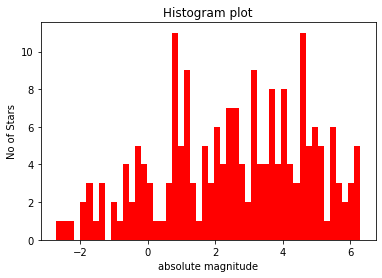

In [90]:
# plotting the histogram

plt.hist(abs_mag,bins=50,color='r')
plt.xlabel("absolute magnitude")
plt.ylabel("No of Stars")
plt.title("Histogram plot")
plt.show()

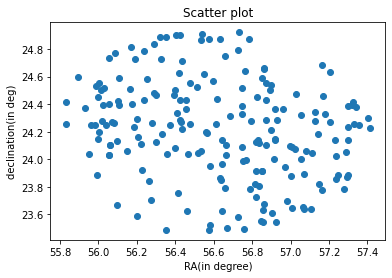

In [42]:
# scatter plot
RA=cleaned_stardata[0]
declination=cleaned_stardata[1]
plt.scatter(RA,declination)
plt.xlabel("RA(in degree)")
plt.ylabel("declination(in deg)")
plt.title("Scatter plot")
plt.show()

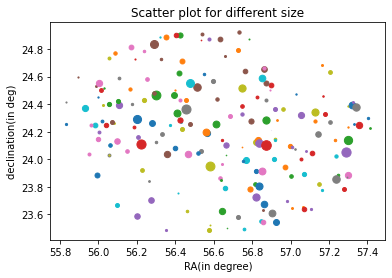

In [44]:
#plotting for different size
size=12-cleaned_stardata[3]
for i in range(len(cleaned_stardata)):
    plt.scatter(RA[i],declination[i],s=10*size[i])
plt.xlabel("RA(in degree)")
plt.ylabel("declination(in deg)")
plt.title("Scatter plot for different size")
plt.show()



# Question 2 : Estimating Age of Universe using Hubble's Law

In [45]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

In [50]:
with open('data.txt','r') as f:
    a=f.read().split('\n')            # reading the data file

In [52]:
del a[0]   # deleting the 1st line as it contains non numeric values

In [58]:
data=[]   #splitting the lines according to commas, now you have a nested list with distance modulus and sight velocity
for line in a:
    data.append(line.split(','))

In [69]:
dist_mod=[]
sight_vel=[]
for i in range (len(data)):
    dist_mod.append(float(data[i][0]))
    sight_vel.append(float(data[i][1]))

In [70]:
dm=np.array(dist_mod)  # converting list to an array
sv=np.array(sight_vel)

In [77]:
d=10**(dm/5-5) # calculating the distances in megaparsecs

In [78]:
d

array([213.79620895, 287.0780582 ,  56.23413252, ..., 162.92960326,
       155.59656316,  98.1747943 ])

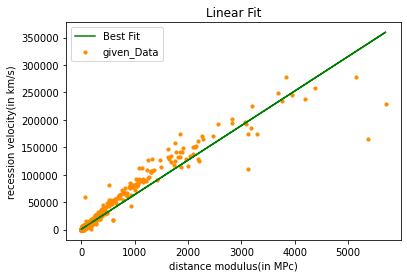

In [88]:
# defining the function 
def lin_func(x,m,c):
    return m*x + c

# Now we need to get the best fit parameters and the respective errors using curve_fit

p_opt, p_cov = cf(lin_func,d,sv)
# p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.

# Now plot the best fit along with the original data to see if we have a good match

plt.plot(d,lin_func(d,*p_opt),label='Best Fit',color='g')
# * before a separable object unpacks it. So you don't need to write lin_func(xdata,p_opt[0],p_opt[1]). The *
# does it for you.
plt.scatter(d,sv,label='given_Data',s=10,color='darkorange')

plt.xlabel('distance modulus(in MPc)')
plt.ylabel('recession velocity(in km/s)')
plt.title('Linear Fit')
plt.legend()
plt.show()

In [85]:
# slope of the curve 
m=p_opt[0]

# Estimating the age of the universe in years
age=(1/m)*((3.09/3.15)*10**12)      # 1 Mpc = 3.09*10**19 km and 1 year = 3.15*10**7 sec
age

15574718656.701183